<a id="cont"></a>

## Table of Contents
<a href=#one2>1. Meet the Collaborators</a>

<a href=#one1>2. Introduction</a>

<a href=#onei>3. Problem Statement</a>


<a href=#one>4. Importing Packages</a>

<a href=#two>5. Loading Data</a>

<a href=#three>6. Exploratory Data Analysis (EDA)</a>


<a href=#four>7. Data Engineering</a>

<a href=#five>8. Modeling</a>

<a href=#six>9. Model Performance</a>

<a href=#seven>10. Model Explanations</a>

<a href=#threefiv>11. Conclusion</a>

<a href=#threefi>12. References</a>

<a href=#threefi>13. Kaggle Submission</a>

<a href=#threefi>14. Saving Models</a>

## 1. Meet the Colaborators

   #### - AbdulMu'izz Okunade
   #### - Ruth Favour Ossai
   #### - Francis Egah
   #### - Lesego Tiro
   #### - Michael Benjamin
   #### - Haruna Jibrin 


### Honour Code 


Honour Code
I {TEAM NM1}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract

<a id="one1"></a>
## 2. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


The world is dealing with a lot of Climate Change issues and companies are expected to operate and contribute to the worlds economy without harming the environment while maintaining a low carbon footprint.They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. To archieve such a goal it is neccesary to know how people perceive climate change and whether or not they believe that the repercussions of harming the eco-system are catastrophic or merely just an exageration.This would contribute to the market research efforts in gauging how their product/service may be received by the population.

There are limited places or plartforms for such a study to carried out, so social media is used to gather data and study it to undertand the perspective of millions around the world towards climate change. Twitter posts are used as input and the sentiment of the tweet is used to interpret the the mindset towards climate change for millions around the world. 


<a id="onei"></a>
## 3.  Problem Statement: Twitter Sentiment Classification

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The aim is to design and create a Machine learning Model that is able to classify wether or not a person believes in climate change.Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies 

 <a id="one"></a>
## 4. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

<a id="two"></a>
## 5. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Load the train and test data

df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test_with_no_labels.csv')

In [3]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [5]:
'''# convert class from numerical to word definition of class
def class_changer(df):
    df = df_train
    word_class = []
    old_class = df['sentiment']
    
    for class_ in old_class:
        if class_ == 2:
            word_class.append('News')
        elif class_ == 1:
            word_class.append('Pro')
        elif class_ == 0:
            word_class.append('Neutral')
        else:
            word_class.append('Anti')
    df['sentiment'] = word_class
    
    return df 
df_train = class_changer(df_train)
df_test = class_changer(df_test)  '''  

"# convert class from numerical to word definition of class\ndef class_changer(df):\n    df = df_train\n    word_class = []\n    old_class = df['sentiment']\n    \n    for class_ in old_class:\n        if class_ == 2:\n            word_class.append('News')\n        elif class_ == 1:\n            word_class.append('Pro')\n        elif class_ == 0:\n            word_class.append('Neutral')\n        else:\n            word_class.append('Anti')\n    df['sentiment'] = word_class\n    \n    return df \ndf_train = class_changer(df_train)\ndf_test = class_changer(df_test)  "

In [6]:
df_train['sentiment word'] = df_train.sentiment.apply(lambda x: "News" if x ==2 else"Pro" if x==1 else "Neutral" if x==0 else "Anti")
df_test['sentiment word'] = df_train.sentiment.apply(lambda x: "News" if x ==2 else"Pro" if x==1 else "Neutral" if x==0 else "Anti")

The train dataset includes all features of the Dataframe.

<a id="three"></a>
## 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1  The INITIAL INSPECTION AND OBSERVATION OF THE TRAIN DATASET



In [7]:
# train Dataset
df_train.head(100)

,sentiment,message,tweetid,sentiment word
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,Pro
2,2,RT @RawStory: Researchers say we have three ye...,698562,News
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,Pro
...,...,...,...,...
95,1,"RT @RonaldKlain: As Trump decides on Paris, @B...",458845,Pro
96,1,RT @savingoceans: Lack of #climate change acti...,695439,Pro
97,1,“Yet another Trump advisor is clueless on clim...,894382,Pro
98,1,RT @StephenSchlegel: she's thinking about how ...,603318,Pro


The first five rows and the last five rows of the dataset. This is the dataframe used to train the model.

In [8]:
df_test.head()

,message,tweetid,sentiment word
0,Europe will now be looking to China to make su...,169760,Pro
1,Combine this with the polling of staffers re c...,35326,Pro
2,"The scary, unimpeachable evidence that climate...",224985,News
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,Pro
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,Pro


This is the dataframe used to test the model.
The Test Data set does not have the sentiment column which is the Target variable. The target varible is predicted in the modelling phase and the results are then compared to the sentiment column in the Train Dataset. This is how the accuracy of the model is measured.

In [9]:
# Columns of the dataset
df_train.columns

Index(['sentiment', 'message', 'tweetid', 'sentiment word'], dtype='object')

These are the columns that make up the dataset 

In [10]:
# Shape of data Set
df_train.shape


(15819, 4)


This shows that the shape of the dataframe entails of 15819 rows and 3 rows.


In [11]:
# total number of entries in dataset
df_train.size

63276

The dataframe consists of 47457 entries.


In [12]:
#unique values in columns
df_train.nunique()

sentiment             4
message           14229
tweetid           15819
sentiment word        4
dtype: int64

This is the the number of unique values present in each of the three columns that makeup the dataset



### 6.1 Column Datatypes


In [13]:
#Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       15819 non-null  int64 
 1   message         15819 non-null  object
 2   tweetid         15819 non-null  int64 
 3   sentiment word  15819 non-null  object
dtypes: int64(2), object(2)
memory usage: 494.5+ KB


In [14]:
# Nullvalues present in each column
df_train.isnull().sum()

sentiment         0
message           0
tweetid           0
sentiment word    0
dtype: int64

As represented above there are no missing values in any of the three feature of the dataset, which means there will not be any neccesary entity replacement in data engineering.


In [15]:
df_train.describe(include='object')

,message,sentiment word
count,15819,15819
unique,14229,4
top,RT @StephenSchlegel: she's thinking about how ...,Pro
freq,307,8530


In [16]:
# The most occuring value in sentiment
df_train['sentiment'].mode()

0    1
Name: sentiment, dtype: int64

The most occuring value in the sentiment column is '1', this is referred to as the mode.

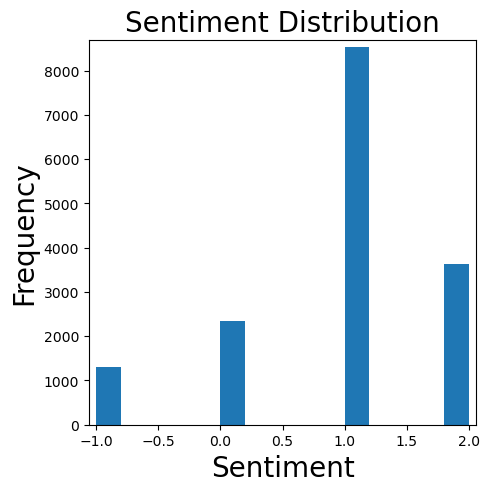

In [74]:
plt.figure(figsize=(5,5))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df_train['sentiment'], bins=15)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

The visual clearly indicates that sentiment 1(Neutral) occurs way more in the sentiment column than 0(pro),-1(News) and 2(Anti). This is the mode.

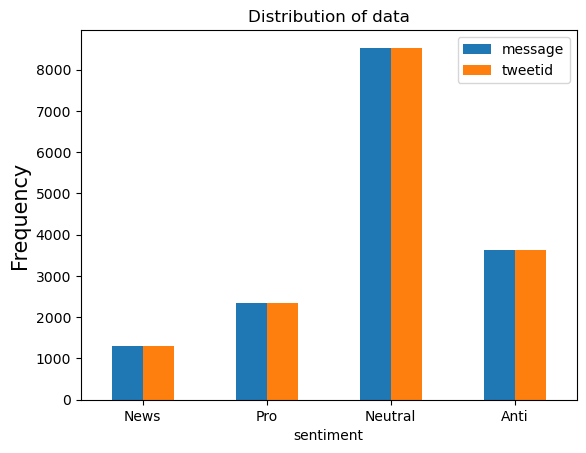

In [83]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['News','Pro', 'Neutral', 'Anti'], rotation=0)
plt.ylabel('Frequency', fontsize=15)
#ax.set_yticklabels(['Count'], rotation=90)
# Storing data in lists.
text, sentiment = list(df_train['message']), list(df_train['sentiment'])

This illustrates the sentiment entities in the dataset in a more understandable sense, the sentiment values are given meaning with -1 as News, 0 as Pro, 1 as Neutral and 2 as Anti. and the visual clearly shows on how each TweetiD is tied to a tweet Message. 

<a id="four"></a>
## 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


**Cleaning and removing URL’s**

In [19]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df_test['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

**Removing Punctuations**

Punctuation Removal: 
In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [20]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df_train['message']= df_train['message'].apply(lambda x:remove_punctuation(x))
df_test['message']= df_train['message'].apply(lambda x:remove_punctuation(x))
df_train.head()

,sentiment,message,tweetid,sentiment word
0,1,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro
1,1,Its not like we lack evidence of anthropogenic...,126103,Pro
2,2,RT RawStory Researchers say we have three year...,698562,News
3,1,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro
4,1,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro


We can see in the above output, all the punctuations are removed from message and stored in the clean_msg column. 

**Lowering the text:**

It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case. We are doing this because we don't want `Message` and `message` or any form of its spellings to be read as  different words.

In [21]:
df_train['message']= df_train['message'].apply(lambda x: x.lower())
df_test['message']= df_train['message'].apply(lambda x: x.lower())

We have succesfully converted all the characters to lower case

In [22]:
tokeniser = TreebankWordTokenizer()

# Apply tokenization to both test and train data
df_train['message'] = df_train['message'].apply(tokeniser.tokenize)
df_test['message'] = df_test['message'].apply(tokeniser.tokenize)

**Removal of Stopwords**

In [23]:
stopwords_list = stopwords.words('english')
stopwords_list = set(stopwords_list)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_list])
df_train['message'] = df_train['message'].apply(lambda text: cleaning_stopwords(text))
df_test['message'] = df_test['message'].apply(lambda text: cleaning_stopwords(text))
df_train.head()

,sentiment,message,tweetid,sentiment word
0,1,"['polyscimajor', 'epa', 'chief', 'doesnt', 'th...",625221,Pro
1,1,"['its', 'not', 'like', 'we', 'lack', 'evidence...",126103,Pro
2,2,"['rt', 'rawstory', 'researchers', 'say', 'we',...",698562,News
3,1,"['todayinmaker', 'wired', '2016', 'was', 'a', ...",573736,Pro
4,1,"['rt', 'soynoviodetodas', 'its', '2016', 'and'...",466954,Pro


**Cleaning and removing repeating characters**

In [24]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_train['message'] = df_train['message'].apply(lambda x: cleaning_repeating_char(x))
df_test['message'] = df_test['message'].apply(lambda x: cleaning_repeating_char(x))
df_train.tail()

,sentiment,message,tweetid,sentiment word
15814,1,"['rt', 'ezlusztig', 'they', 'took', 'down', 't...",22001,Pro
15815,2,"['rt', 'washingtonpost', 'how', 'climate', 'ch...",17856,News
15816,0,"['notiven', 'rt', 'nytimesworld', 'what', 'doe...",384248,Neutral
15817,-1,"['rt', 'sara8smiles', 'hey', 'liberals', 'the'...",819732,Anti
15818,0,"['rt', 'chetcannon', 'kurteichenwalds', 'clima...",806319,Neutral


**Cleaning and removing Numbers**

In [25]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

#Apply cleaning_number function to train and test data
df_train['message'] = df_train['message'].apply(lambda x: cleaning_numbers(x))
df_test['message'] = df_test['message'].apply(lambda x: cleaning_numbers(x))
df_train.tail()

,sentiment,message,tweetid,sentiment word
15814,1,"['rt', 'ezlusztig', 'they', 'took', 'down', 't...",22001,Pro
15815,2,"['rt', 'washingtonpost', 'how', 'climate', 'ch...",17856,News
15816,0,"['notiven', 'rt', 'nytimesworld', 'what', 'doe...",384248,Neutral
15817,-1,"['rt', 'sarasmiles', 'hey', 'liberals', 'the',...",819732,Anti
15818,0,"['rt', 'chetcannon', 'kurteichenwalds', 'clima...",806319,Neutral


**Tokenization:** 

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

tokeniser = TreebankWordTokenizer()
df_train['message'] = df_train['message'].apply(tokeniser.tokenize)
df_test['message'] = df_test['message'].apply(tokeniser.tokenize)

In [26]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [27]:
df_train['message'] = df_train['message'].apply(lambda x: tokenization(x.lower()))
df_test['message'] = df_test['message'].apply(lambda x: tokenization(x.lower()))

In [28]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_train['message']= df_train['message'].apply(lambda x: stemming_on_text(x))
df_test['message']= df_test['message'].apply(lambda x: stemming_on_text(x))
df_train.head()

,sentiment,message,tweetid,sentiment word
0,1,"[, polyscimajor, epa, chief, doesnt, think, ca...",625221,Pro
1,1,"[, its, not, like, we, lack, evidence, of, ant...",126103,Pro
2,2,"[, rt, rawstory, researchers, say, we, have, t...",698562,News
3,1,"[, todayinmaker, wired, was, a, pivotal, year,...",573736,Pro
4,1,"[, rt, soynoviodetodas, its, and, a, racist, s...",466954,Pro


In [29]:
lemma = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemma.lemmatize(word) for word in data]
    return data
df_train['message'] = df_train['message'].apply(lambda x: lemmatizer_on_text(x))
df_test['message'] = df_test['message'].apply(lambda x: lemmatizer_on_text(x))
df_train.head()

,sentiment,message,tweetid,sentiment word
0,1,"[, polyscimajor, epa, chief, doesnt, think, ca...",625221,Pro
1,1,"[, its, not, like, we, lack, evidence, of, ant...",126103,Pro
2,2,"[, rt, rawstory, researchers, say, we, have, t...",698562,News
3,1,"[, todayinmaker, wired, was, a, pivotal, year,...",573736,Pro
4,1,"[, rt, soynoviodetodas, its, and, a, racist, s...",466954,Pro


**Separating input feature and Output**

In [30]:
X=df_train.message
y=df_train.sentiment

In [31]:
dx = df_test.message

In [32]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 20, random_state =42)

In [33]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=df_train.message) 
countVector = countVectorizer.fit_transform(df_train['message'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(dx)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
dx = vectoriser.transform(dx)

**Transforming Dataset using TF-IDF Vectorizer**

In [ ]:
'''vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)
vectoriser.fit(X_train.apply(lambda x: ' '.join(x)))
print('No. of feature_words: ', len(vectoriser.get_feature_names()))'''

In [ ]:
'''X_train = vectoriser.transform(X_train.apply(lambda x: ' '.join(x)))
X_test  = vectoriser.transform(X_test.apply(lambda x: ' '.join(x)))'''

<a id="five"></a>
## 8. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Splitting the data into features and labels

In [ ]:
# features
X=df_train['message']

# labels
y=df_train['sentiment']

Transforming the categorical features (create dummy variables)

In [ ]:
# Transforming the Features
#X_transformed = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

We create an instance of the LogisticRegression() object using the default parameters

In [ ]:
lr = LogisticRegression()

The parameters consist of the intercept and the coefficients related to the features.These parameters can be used to predict future claims given the features, so we can extract the parameters.

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.intercept_[0]  

In [ ]:
coeff_df = pd.DataFrame(lr.coef_.T, X_transformed.columns, columns=['Coefficient'])
coeff_df

Next we will use the predict method to obtain predictions from our test data observations.

In [ ]:
pred_lr = lr.predict(X_test)

<a id="six"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 10. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="threefiv"></a>

## 11. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

<a id="threefi"></a>

## 12. References
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

1.https://heartbeat.comet.ml/exploratory-data-analysis-eda-for-categorical-data-870b37a79b65

2.https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html

 <a id="threef"></a>

## 13.  Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

In [ ]:
df_test['sentiment'] = LRmodel.predict(dx)

In [ ]:
load = df_test[['tweetid', 'sentiment']]
load.to_csv('sample_submission_climate.csv', index = False)
load

<a id="threeif"></a>

## 14 Saving the Models
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>